In [56]:
ors = 1

In [32]:
import simplekml
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
import os
import sys
sys.path.append('../_amigocloud')

In [58]:
# RUTA ONEDRIVE
ruta_data = r'G:'
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

# leer los dos shps de siembra y puntos de planificacion
path_cat = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2024\SHP\catastro140624.shp'
path_puntos = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2024\SHP\PUNTOS_PLAN.shp'
path_plan = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2024\SHP\PLANIFICACION.shp'


In [149]:
path_xlsx_parte = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2024\parte_diario_pulverizacion.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [74]:
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [75]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,"MULTIPOINT (471806.721 8096238.994, 472970.293..."


In [76]:
multipoint_gdf = gdf_puntos_sem

In [77]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [84]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (471806.721 8096238.994)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (472970.293 8094540.304)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (473020.071 8095262.092)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (473418.299 8095859.434)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (473480.522 8094932.310)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (473505.411 8095361.649)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (473710.747 8095031.866)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (473785.415 8095492.317)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (474662.761 8095635.430)
0,515,AGUILERA OLGA RIVERO VDA DE,1,0,None,None,POINT (474874.319 8095174.980)


<Axes: >

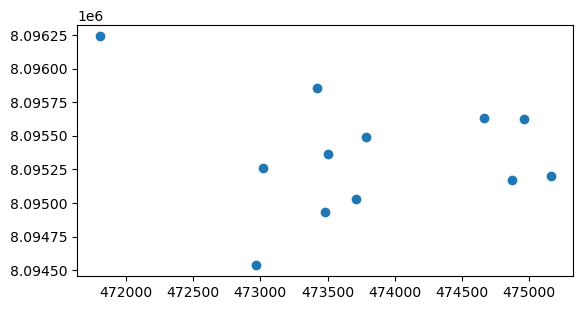

In [85]:
puntos_indi.plot()

In [93]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [94]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [95]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
79,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B5,31.873906,0,50,"POLYGON ((473172.859 8095514.883, 473059.458 8..."
1207,17,LA ESTACADA--OLGUITA,1215,AGUILERA RIVERO OLGA KARINA,C13,18.784765,2,50,"POLYGON ((473067.113 8095474.826, 473168.713 8..."
1213,17,LA ESTACADA--OLGUITA,40004,AGUILERA RIVERO NICOLAS JULIO,B2,8.774324,4,50,"POLYGON ((473376.856 8094747.164, 473373.237 8..."
1214,17,LA ESTACADA--OLGUITA,1215,AGUILERA RIVERO OLGA KARINA,B3,8.359979,2,50,"POLYGON ((473908.443 8095253.236, 473911.818 8..."
1218,17,LA ESTACADA--OLGUITA,40004,AGUILERA RIVERO NICOLAS JULIO,A2,6.297957,4,50,"POLYGON ((475023.100 8095179.726, 474935.448 8..."
1222,17,LA ESTACADA--OLGUITA,40004,AGUILERA RIVERO NICOLAS JULIO,A3,4.919246,4,50,"POLYGON ((474753.943 8095311.778, 474918.274 8..."
7130,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C2.1,22.304739,1,50,"POLYGON ((472997.300 8094944.599, 473222.431 8..."
9176,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A5,15.732790,0,50,"POLYGON ((474813.414 8095564.405, 474681.793 8..."
9471,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C20.2,22.312441,1,50,"POLYGON ((471713.392 8096070.087, 471581.333 8..."
9691,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B4.2,20.774229,0,50,"POLYGON ((473731.082 8095207.674, 473290.112 8..."


In [98]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [99]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
79,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B5,31.873906,0,50,"POLYGON ((473172.859 8095514.883, 473059.458 8..."
1207,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C13,18.784765,2,50,"POLYGON ((473067.113 8095474.826, 473168.713 8..."
1213,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B2,8.774324,4,50,"POLYGON ((473376.856 8094747.164, 473373.237 8..."
1214,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B3,8.359979,2,50,"POLYGON ((473908.443 8095253.236, 473911.818 8..."
1218,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A2,6.297957,4,50,"POLYGON ((475023.100 8095179.726, 474935.448 8..."
1222,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A3,4.919246,4,50,"POLYGON ((474753.943 8095311.778, 474918.274 8..."
7130,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C2.1,22.304739,1,50,"POLYGON ((472997.300 8094944.599, 473222.431 8..."
9176,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A5,15.732790,0,50,"POLYGON ((474813.414 8095564.405, 474681.793 8..."
9471,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C20.2,22.312441,1,50,"POLYGON ((471713.392 8096070.087, 471581.333 8..."
9691,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B4.2,20.774229,0,50,"POLYGON ((473731.082 8095207.674, 473290.112 8..."


In [100]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [102]:
plan = poligonos_intersect_cat.copy()

<Axes: >

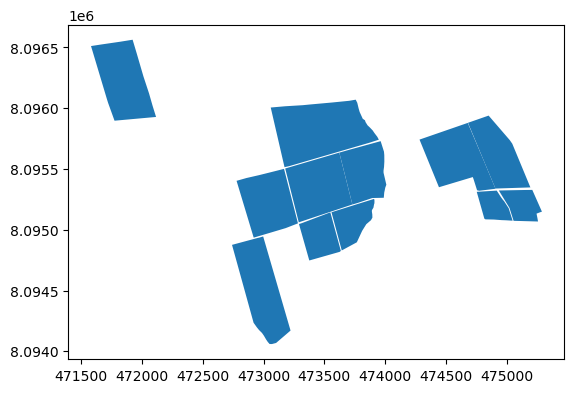

In [108]:
plan.plot()

In [109]:
plan['area'].sum()

194.59169749622697

In [110]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [111]:
plan['area'].sum()

194.59169749622697

In [112]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [113]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [114]:
last_id

0

In [115]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [116]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,id
79,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B5,31.873906,0,50,"POLYGON ((473172.859 8095514.883, 473059.458 8...",,SOLICITUD,0,,1,1
1207,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C13,18.784765,2,50,"POLYGON ((473067.113 8095474.826, 473168.713 8...",,SOLICITUD,0,,1,2
1213,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B2,8.774324,4,50,"POLYGON ((473376.856 8094747.164, 473373.237 8...",,SOLICITUD,0,,1,3
1214,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B3,8.359979,2,50,"POLYGON ((473908.443 8095253.236, 473911.818 8...",,SOLICITUD,0,,1,4
1218,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A2,6.297957,4,50,"POLYGON ((475023.100 8095179.726, 474935.448 8...",,SOLICITUD,0,,1,5
1222,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A3,4.919246,4,50,"POLYGON ((474753.943 8095311.778, 474918.274 8...",,SOLICITUD,0,,1,6
7130,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C2.1,22.304739,1,50,"POLYGON ((472997.300 8094944.599, 473222.431 8...",,SOLICITUD,0,,1,7
9176,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A5,15.732790,0,50,"POLYGON ((474813.414 8095564.405, 474681.793 8...",,SOLICITUD,0,,1,8
9471,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C20.2,22.312441,1,50,"POLYGON ((471713.392 8096070.087, 471581.333 8...",,SOLICITUD,0,,1,9
9691,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B4.2,20.774229,0,50,"POLYGON ((473731.082 8095207.674, 473290.112 8...",,SOLICITUD,0,,1,10


In [117]:
len(plan)

12

In [118]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21364\364328693.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)


In [119]:
gdf_pla_gral['area'].sum()

194.59169749622697

In [120]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [121]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

# CARGAR PLANIFICACION A AMIGOCLOUD

In [123]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [124]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [125]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [126]:
len(gdf_pla_gral)

12

In [128]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/35248/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_360912 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CARGAR XLSX

In [146]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [147]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [150]:
excel_data = pd.read_excel(path_xlsx_parte)

In [151]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,id
79,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B5,31.873906,0,50,"MULTIPOLYGON (((-63.25233 -17.22520, -63.25340...",,SOLICITUD,0,,1,1
1207,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C13,18.784765,2,50,"MULTIPOLYGON (((-63.25333 -17.22556, -63.25237...",,SOLICITUD,0,,1,2
1213,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B2,8.774324,4,50,"MULTIPOLYGON (((-63.25043 -17.23214, -63.25046...",,SOLICITUD,0,,1,3
1214,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B3,8.359979,2,50,"MULTIPOLYGON (((-63.24542 -17.22757, -63.24539...",,SOLICITUD,0,,1,4
1218,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A2,6.297957,4,50,"MULTIPOLYGON (((-63.23494 -17.22825, -63.23576...",,SOLICITUD,0,,1,5
1222,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A3,4.919246,4,50,"MULTIPOLYGON (((-63.23747 -17.22705, -63.23592...",,SOLICITUD,0,,1,6
7130,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C2.1,22.304739,1,50,"MULTIPOLYGON (((-63.25399 -17.23035, -63.25189...",,SOLICITUD,0,,1,7
9176,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,A5,15.732790,0,50,"MULTIPOLYGON (((-63.23690 -17.22477, -63.23814...",,SOLICITUD,0,,1,8
9471,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C20.2,22.312441,1,50,"MULTIPOLYGON (((-63.26606 -17.22016, -63.26729...",,SOLICITUD,0,,1,9
9691,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,B4.2,20.774229,0,50,"MULTIPOLYGON (((-63.24709 -17.22798, -63.25124...",,SOLICITUD,0,,1,10


In [152]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'ORIGEN': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [153]:
new_df['MEZCLA'] = 0
new_df['LABOR_REALIZADA'] = 'PUL. CON DRONE'

In [154]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,ORIGEN,ID,OS,MEZCLA,LABOR_REALIZADA
0,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,B5,31.873906,0,SOLICITUD,1,1,0,PUL. CON DRONE
1,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,C13,18.784765,2,SOLICITUD,2,1,0,PUL. CON DRONE
2,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,B2,8.774324,4,SOLICITUD,3,1,0,PUL. CON DRONE
3,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,B3,8.359979,2,SOLICITUD,4,1,0,PUL. CON DRONE
4,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,A2,6.297957,4,SOLICITUD,5,1,0,PUL. CON DRONE
5,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,A3,4.919246,4,SOLICITUD,6,1,0,PUL. CON DRONE
6,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,C2.1,22.304739,1,SOLICITUD,7,1,0,PUL. CON DRONE
7,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,A5,15.732790,0,SOLICITUD,8,1,0,PUL. CON DRONE
8,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,C20.2,22.312441,1,SOLICITUD,9,1,0,PUL. CON DRONE
9,50,515,AGUILERA OLGA RIVERO VDA DE,17,LA ESTACADA--OLGUITA,B4.2,20.774229,0,SOLICITUD,10,1,0,PUL. CON DRONE


In [155]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21364\1827303315.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat([excel_data, new_df], ignore_index=True)


In [156]:
final_data.to_excel(path_xlsx_parte, index=False)